# Visualizing frame dragging in Kerr space-time

### Importing required modules

In [1]:
from astropy import units as u
import numpy as np
from einsteinpy.metric import Kerr
from einsteinpy.coordinates import BoyerLindquistDifferential
from einsteinpy.bodies import Body
from einsteinpy.geodesic import Geodesic

### Defining position/velocity of test particle
  - Initial velocity is kept 0

In [2]:
M = 1.989e30 * u.kg
a = 0.3 * u.m
BL_obj = BoyerLindquistDifferential(49.95e5 * u.km, np.pi / 2 * u.rad, np.pi * u.rad,
                                    0 * u.km / u.s, 0 * u.rad / u.s, 0 * u.rad / u.s,
                                    a)

In [3]:
end_lambda = ((1 * u.year).to(u.s)).value / 930
# Choosing stepsize for ODE solver to be 0.02 minutes
stepsize = ((0.02 * u.min).to(u.s)).value

In [4]:
obj = Kerr.from_coords(BL_obj, M)
ans = obj.calculate_trajectory(
    end_lambda=end_lambda, OdeMethodKwargs={"stepsize": stepsize}, return_cartesian=True
)[1]
x, y = ans[:,1], ans[:,2]

### Plotting the trajectory

In [5]:
%matplotlib inline

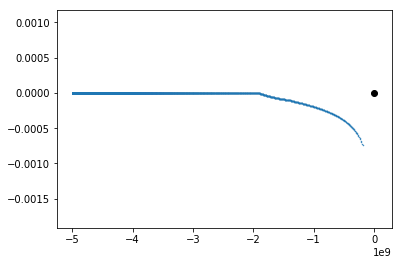

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=0.2)
plt.scatter(0,0, c='black')
plt.show()

#### It can be seen that as the particle approaches the massive body, it acquires axial velocity due to spin and frame-dragging effect of the body.

## Another Way of calculating Geodesics

In [7]:
a = 0.3 * u.m
Attractor = Body(name="BH", mass=1.989e30 * u.kg, a=a)
init_conditions = BoyerLindquistDifferential(49.95e5 * u.km, np.pi / 2 * u.rad, 
                                             np.pi * u.rad, 0 * u.km / u.s, 
                                             0 * u.rad / u.s, 0 * u.rad / u.s,
                                             a)
Particle = Body(differential=init_conditions, parent=Attractor)

In [8]:
geodesic = Geodesic(body=Particle, time=0 * u.s, end_lambda=33932.90, 
                    step_size=1.2, metric=Kerr)
ans = geodesic.trajectory

In [9]:
x, y = ans[:,1], ans[:,2]

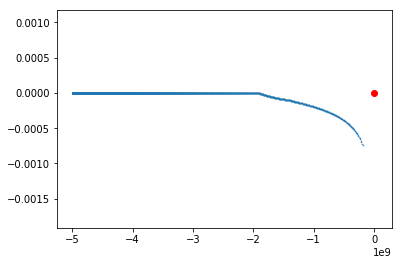

In [10]:
%matplotlib inline

plt.scatter(x,y, s=0.2)
plt.scatter(0,0, c='red')
plt.show()